In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pretraitement

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
DATA_x = pd.read_csv('data/X_train_G3tdtEn.csv', delimiter = ',',encoding = 'latin1')
DATA_y = pd.read_csv('data/Y_train_2_XPXJDyy.csv', delimiter = ',',encoding = 'latin1')

C:\Users\kille\AppData\Local\Temp\ipykernel_23504\2876525926.py:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA_x = pd.read_csv('data/X_train_G3tdtEn.csv', delimiter = ',',encoding = 'latin1')


In [34]:
tab_item_X, tab_make_X = pretraitement.get_item_make_arrays(DATA_x)

In [35]:
print("Nombre de catégories : ", len(tab_item_X))
print("Nombre de marques : ", len(tab_make_X))
print("Taille du pandasframe : ", DATA_x.shape)

Nombre de catégories :  174
Nombre de marques :  830
Taille du pandasframe :  (92790, 146)


In [36]:
DATA_x_make= pretraitement.dataframe_make(DATA_x,tab_make_X)


In [37]:
# Rajout de la colonne "Nb_of_items" 
DATA_x_make['Nb_of_items'] = DATA_x['Nb_of_items']

# Rajoute les colonnes "cash_price1", "cash_price2", ..., "cash_price24"
cash_price_columns = ["cash_price" + str(i) for i in range(1, 25)]
X_cash_price = DATA_x[cash_price_columns]
DATA_x_make = pd.concat([DATA_x_make, X_cash_price], axis=1)

# Dans le doute où le modèle ne sait pas gérer les NaN et les cases vides, on remplace par des 0.
DATA_x_make = DATA_x_make.fillna(0)

In [38]:
print("Taille du pandasframe : ", DATA_x_make.shape)

Taille du pandasframe :  (92790, 855)


In [39]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(DATA_x_make, DATA_y['fraud_flag'], test_size=0.3, random_state=42)

In [40]:

# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

Importance des variables :
1. cash_price1 (0.532736)
2. cash_price2 (0.298255)
3. cash_price3 (0.028204)
4. APPLE (0.024262)
5. RETAILER (0.010945)
6. Nb_of_items (0.010775)
7. SAMSUNG (0.010024)
8. cash_price4 (0.008795)
9. cash_price5 (0.004796)
10. LG (0.003557)
11. ADIDAS (0.003184)
12. MORPHY RICHARDS (0.002919)
13. cash_price6 (0.002565)
14. SAMSONITE (0.002557)
15. GAIA BABY (0.002553)
16. TOMMY HILFIGER (0.002440)
17. SILVER CROSS (0.002412)
18. SONY (0.002371)
19. RING (0.002298)
20. NIKON (0.002227)
21. MAISON FRANCIS KURKDJIAN (0.001767)
22. PANASONIC (0.001752)
23. RALPH LAUREN (0.001677)
24. SONOS (0.001610)
25. MAXI-COSI (0.001428)
26. TEMPUR (0.001230)
27. KARTELL (0.001174)
28. 4MOMS (0.001120)
29. BUGABOO (0.001113)
30. PHILIPS (0.001092)
31. KATIE LOXTON (0.001037)
32. GALLERY PERFECT (0.000994)
33. cash_price7 (0.000988)
34. cash_price8 (0.000834)
35. cash_price11 (0.000803)
36. ANYDAY RETAILER (0.000797)
37. TOM FORD (0.000775)
38. BT (0.000743)
39. cash_price16 (0.

c:\Users\kille\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kille\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


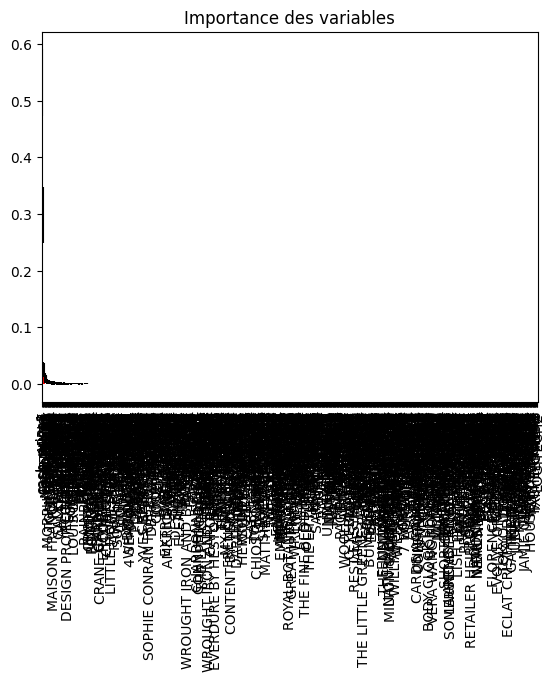

In [42]:
# extraction de l'importance relative des variables
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# affichage des variables et de leur importance relative
print("Importance des variables :")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# affichage d'un histogramme de l'importance relative des variables
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [24]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.051286440115104456


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Création de l'estimateur
rfc = RandomForestClassifier(random_state=42)

# Définition de la fonction de score
scorer = make_scorer(average_precision_score, greater_is_better=True)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Affichage des résultats
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print("Meilleur score :")
print(grid_search.best_score_)

Meilleurs hyperparamètres :
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score :
0.01881264718878599


In [28]:
# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, min_samples_leaf=1,min_samples_split=2)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.018279337276456007


# Envie de tester avec les prix uniquements

In [3]:
cash_price_columns = ["cash_price" + str(i) for i in range(1, 4)]
nbr_columns = ["Nbr_of_prod_purchas" + str(i) for i in range(1, 4)]

selection_colonnes = ['ID'] + cash_price_columns
df_prices = DATA_x[selection_colonnes]
df_prices = pd.merge(df_prices, DATA_y, on='ID')
df_prices = df_prices.drop("ID", axis=1)
df_prices = df_prices.drop("index",axis=1)
df_prices

,cash_price1,cash_price2,cash_price3,fraud_flag
0,889.0,NaN,NaN,0
1,409.0,NaN,NaN,0
2,1399.0,NaN,NaN,0
3,689.0,119.0,NaN,0
4,1199.0,NaN,NaN,0
...,...,...,...,...
92785,299.0,7.0,NaN,0
92786,898.0,NaN,NaN,0
92787,519.0,259.0,949.0,0
92788,1099.0,2099.0,NaN,0


In [4]:
Y = df_prices['fraud_flag']
X = df_prices.drop("fraud_flag", axis=1)

In [5]:
X = X.fillna(0)

In [7]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


# Création de l'objet de modèle
model = xgb.XGBClassifier()
model2 = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

In [11]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)
average_precision2 = average_precision_score(y_test, y_pred2)

print("XGB booster average_precision :", average_precision)
print("logistic average_precision :", average_precision2)

XGB booster average_precision : 0.041873907491766255
logistic average_precision : 0.014656751805151417


In [61]:

# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=250, random_state=42)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

In [62]:
# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.04409784767447231


Importance des variables :
1. cash_price1 (0.535108)
2. cash_price2 (0.396550)
3. cash_price3 (0.068342)


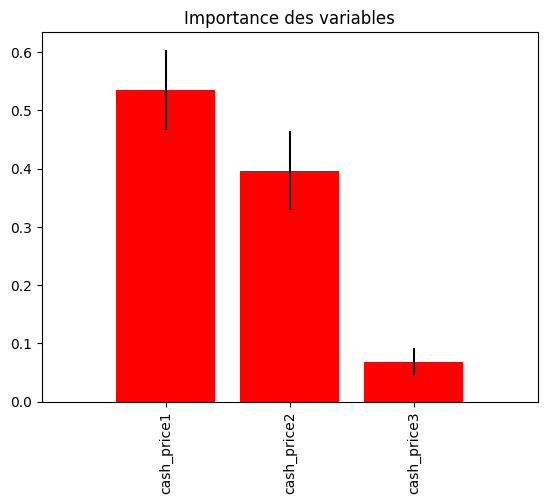

In [64]:
# extraction de l'importance relative des variables
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# affichage des variables et de leur importance relative
print("Importance des variables :")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# affichage d'un histogramme de l'importance relative des variables
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()